# <img style="float: left; padding-right: 10px; width: 45px" src="iacs.png"> S-109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

Names of people you have worked with goes here:  **Vivek Mishra**



<hr style="height:2pt">

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

In [2]:
from IPython.display import HTML
style = "<style>div.exercise { background-color: #ffcccc;border-color: #E9967A; border-left: 5px solid #800080; padding: 0.5em;}</style>"
HTML(style)

In [3]:
import config # User-defined config file
plt.rcParams.update(config.pars) # Update rcParams to make nice plots

<div class="theme"> Main Theme: Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `dataset_1.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

<div class="exercise"> <b> Question 1 [10 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `dataset_1.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set dataframe in the variable `train_data`.  Store your test set dataframe in the variable `test_data`.


**1.2**. Generate a scatter plot of the training data points with well-chosen labels on the x and y axes. The time of the day should be on the x-axis and the number of taxi pickups on the y-axis.  Make sure to title your plot.

**1.3**. Does the pattern of taxi pickups make intuitive sense to you? 


### Answers

**1.1**

In [4]:
## Code here

#load dataset from csv file dataset_1.csv into a pandas data frame
df1 = pd.read_csv("dataset_1.csv")
df1.head()

'''
Use the train_test_split method from sklearn with a random_state of 42
and a test_size of 0.2 to split the dataset into training and test sets
Store your test set dataframe in the variable test_data.
'''
train_data, test_data = train_test_split(df1, test_size=0.2, random_state=42)


**1.2**

Text(0.5,1,'Number of taxi pickups at different times of the day')

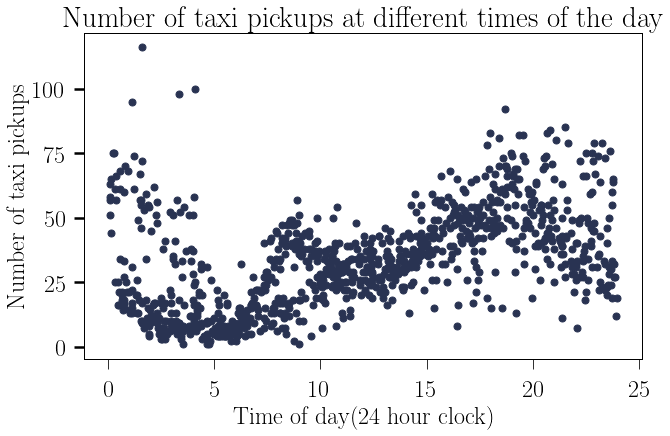

In [5]:
## Code for your plot here
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(train_data.TimeMin/60, train_data.PickupCount)
ax.set_xlabel(r'Time of day(24 hour clock)')
ax.set_ylabel(r'Number of taxi pickups')
ax.set_title(r'Number of taxi pickups at different times of the day')

**1.3**

**Does the pattern of taxi pickups make intuitive sense to you?**

Yes it does. Early in the morning, number of pickups are low. It picks up at morning rush hour, to dip a little and peak in the evening. It then goes down again late at night. There are obviously exceptions.

<div class="exercise"> <b>Question 2 [20 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built-in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your predictor variable (aka, feature) and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$ on the training set, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` with a scatter plot of predicted `PickupCount` vs `TimeMin`.  Do the same for the test set.  You should have one figure with 2 x 7 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. In each subplot, use two different colors and/or markers to distinguish k-NN regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$.

**Hints**:
1. Reporting the $R^2$ values in tabular form is encouraged.
2. You should order your reported $R^2$ values by $k$.

**2.4**. Plot the $R^2$ values from the model on the training and test set as a function of $k$ on the same figure.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ visualization on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

### Answers

**2.1**

In [6]:
## Code here
from sklearn.neighbors import KNeighborsRegressor

# Choose TimeMin as your predictor variable (aka, feature) and PickupCount as your response variable. 
time_min_train = train_data.TimeMin
time_min_train = time_min_train.values.reshape(-1, 1)
pickup_count_train = train_data.PickupCount

# Prepare test data
time_min_test = test_data.TimeMin
time_min_test = time_min_test.values.reshape(-1, 1)
pickup_count_test = test_data.PickupCount

# Create a dictionary of KNeighborsRegressor objects and call it KNNModels.    
KNNModels = {}

scores_train = [] # R2 training scores
scores_test = [] # R2 test scores

# For k∈{1,10,75,250,500,750,1000}, fit k-NN regressor models on the training set (train_data).
ks = [1, 10, 75, 250, 500, 750, 1000]
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(time_min_train, pickup_count_train)
    score_train = knnreg.score(time_min_train, pickup_count_train) # Calculate R^2 score
    scores_train.append(score_train)
    score_test = knnreg.score(time_min_test, pickup_count_test) # Calculate R^2 score
    scores_test.append(score_test)
    # Let the key for your KNNmodels dictionary be the value of k 
    # and the value be the corresponding KNeighborsRegressor object.
    KNNModels[k] = knnreg # Store the regressors in the dictionary

**2.2**

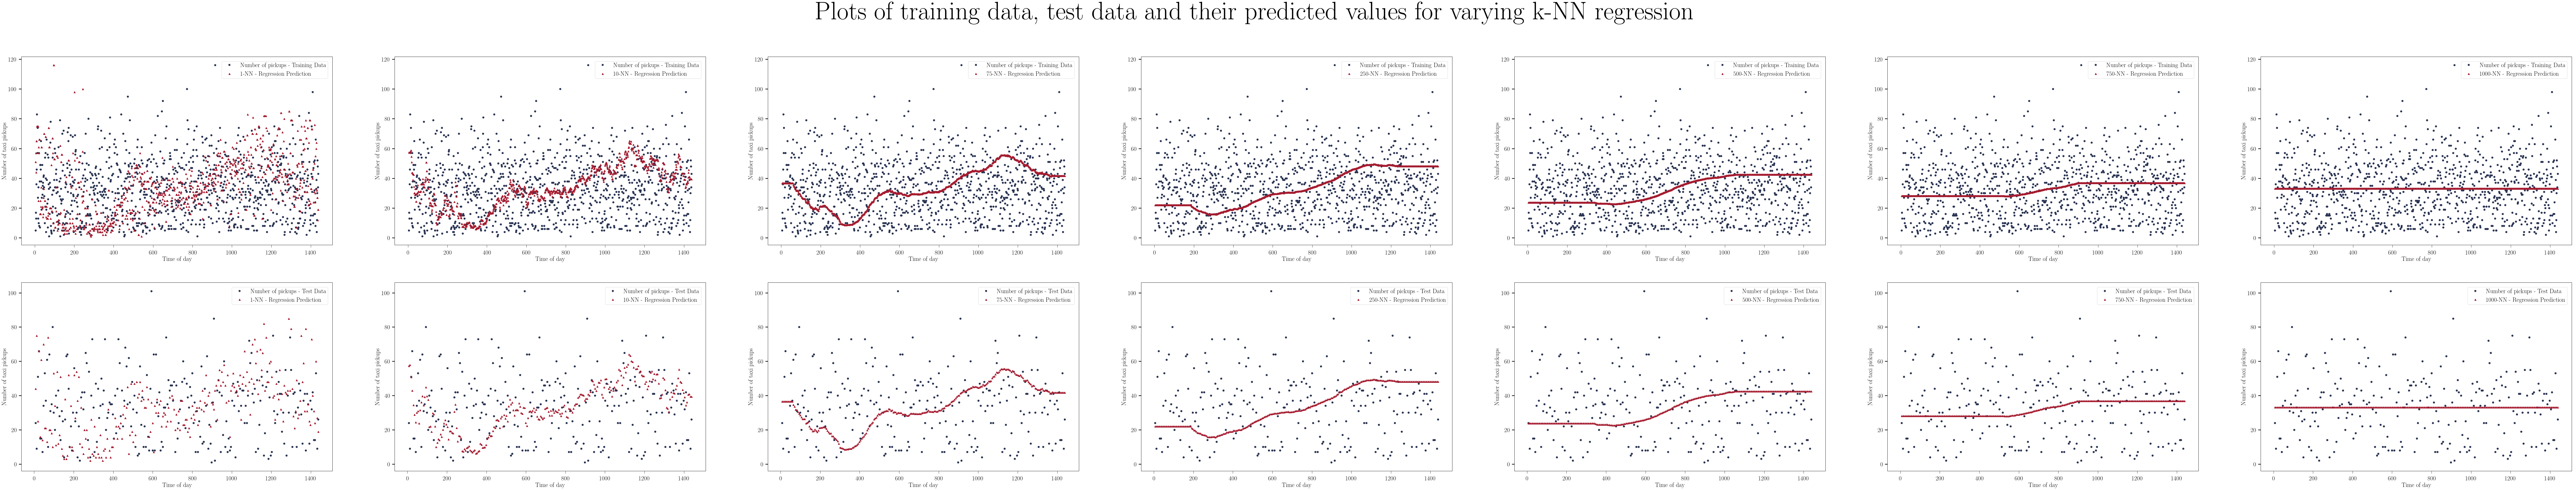

In [7]:
## Code for your plot here
'''
For each k on the training set, overlay a scatter plot of the actual values of PickupCount vs. TimeMin
with a scatter plot of predicted PickupCount vs TimeMin. 
Do the same for the test set. 
You should have one figure with 2 x 7 total subplots; 
for each  k the figure should have two subplots, one subplot for the training set and one for the test set.
'''
# Plot
xgrid_train = np.linspace(np.min(time_min_train), np.max(time_min_train), 1000)
xgrid_test = np.linspace(np.min(time_min_test), np.max(time_min_test), 250)
fig, ax = plt.subplots(2, len(list(KNNModels.keys())), figsize=(180, 30))
fig.suptitle('Plots of training data, test data and their predicted values for varying k-NN regression', fontsize=100)

for k in ks:
    index_of_k = ks.index(k)
    
    train_predictions = KNNModels[k].predict(xgrid_train.reshape(1000,1))
    ax[0, index_of_k].plot(xgrid_train, pickup_count_train, 'o', label="Number of pickups - Training Data".format(k))
    ax[0, index_of_k].plot(xgrid_train, train_predictions, '^', label="{}-NN - Regression Prediction".format(k))
    ax[0, index_of_k].legend();
    ax[0, index_of_k].set_xlabel(r'Time of day')
    ax[0, index_of_k].set_ylabel(r'Number of taxi pickups')
    
    test_predictions = KNNModels[k].predict(xgrid_test.reshape(250,1))
    ax[1, index_of_k].plot(xgrid_test, pickup_count_test, 'o', label="Number of pickups - Test Data".format(k))
    ax[1, index_of_k].plot(xgrid_test, test_predictions, '^', label="{}-NN - Regression Prediction".format(k))
    ax[1, index_of_k].legend();
    ax[1, index_of_k].set_xlabel(r'Time of day')
    ax[1, index_of_k].set_ylabel(r'Number of taxi pickups')

**2.3**

In [8]:
## Code here
'''
Report the  R2 score for the fitted models on both the training and test sets for each k.
'''
from IPython.display import display, HTML
df = pd.concat([pd.Series(ks), pd.Series(scores_train), pd.Series(scores_test)], axis=1)
df = df.rename(columns={0: "k", 1: "Training R2 Scores", 2: "Test R2 Scores"})
display(df)

,k,Training R2 Scores,Test R2 Scores
0,1,0.712336,-0.418932
1,10,0.509825,0.272068
2,75,0.445392,0.390310
3,250,0.355314,0.340341
4,500,0.290327,0.270321
5,750,0.179434,0.164909
6,1000,0.000000,-0.000384


**2.4**

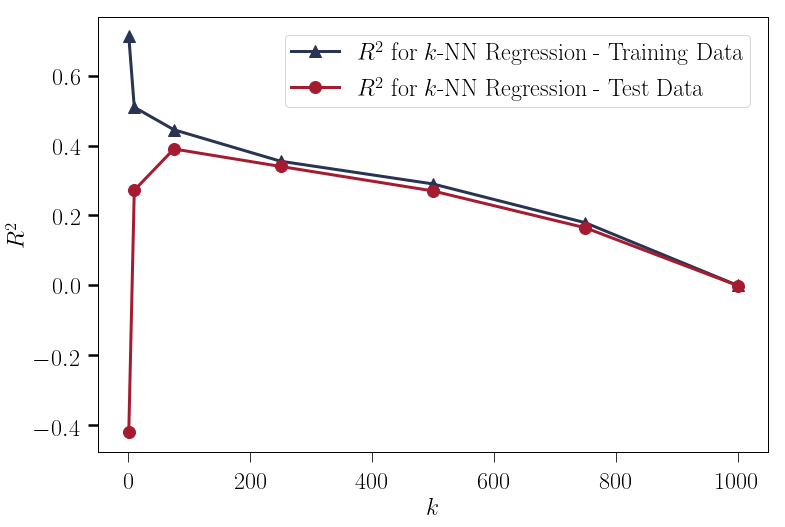

In [9]:
## Code for your plot here
'''
Plot the  R2  values from the model on the training and test set as a function of k on the same figure.
'''
# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train, '^-', ms=12, label="$R^{2}$ for $k$-NN Regression - Training Data")
ax.plot(ks, scores_test,'o-', ms=12, label="$R^{2}$ for $k$-NN Regression - Test Data")
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')
ax.legend();

**2.5**

**Discuss the results**


1. *If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?*  

    **The model will always predict a constant average value.**
    
    
2. *What does an $R^2$ score of $0$ mean?*

    **0 indicates that the model explains none of the variability of the response data around its mean. This means that a horizontal line explains the data equally as well as your model.**
    

3. *What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?*

    **When $R^2$ < 0, a horizontal line explains the data better than your model. In the calculated values, the $R^2$ for 1-NN regression model on test data is negative.**
    
       
4. *Do the training and test $R^2$ plots exhibit different trends?  Describe.*  

    **The training and test $R^2$ plots exhibit different trends. The training plot starts at a high $R^2$ for $k = 1$ and gradually decreases to 0 for $k = n$. The test plot's $R^2$ increases till it reaches a peak for $k = 75$ and then gradually decreases to 0 for $k = n$**
    
        
5. *How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?*

    **The training plot starts at a high $R^2$ for $k = 1$ and gradually decreases to 0 for $k = n$. The test plot's $R^2$ increases till it reaches a peak for $k = 75$ and then gradually decreases to 0 for $k = n$. There is an optimal value for $k$ between $k = 1$ and $k = n$.**
    
    
6. *What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?*

    **The best value of $k$ is $75$. The $R^2$ value for training set is $0.445392$ and for test set is $0.390310$**
    

<div class="exercise"> <b> Question 3  [20 pts] </b></div>

We next consider simple linear regression for the same train-test data sets, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor variable and `PickupCount` as your response variable.  Create a `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.  You may notice something peculiar about how they compare.

**3.4**. Report the slope and intercept values for the fitted linear model.  

**3.5**. Report the $95\%$ confidence interval for the slope and intercept.

**3.6**. Create a scatter plot of the residuals ($e = y - \hat{y}$) of the linear regression model on the training set as a function of the predictor variable (i.e. `TimeMin`). Place on your plot a horizontal line denoting the constant zero residual.  

**3.7**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?  
4. Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.

### Answers

**3.1**

In [10]:
## Code here
'''
Again choose TimeMin as your predictor variable and PickupCount as your response variable. 
Create a OLS class instance and use it to fit a Linear Regression model on the training set (train_data). 
Store your fitted model in the variable OLSModel.
'''
import statsmodels.api as sm

# create the X matrix by appending a column of ones to train_data.TimeMin
time_min_train = np.array([train_data.TimeMin]).T
time_min_train = sm.add_constant(time_min_train)
time_min_test = np.array([test_data.TimeMin]).T
time_min_test = sm.add_constant(time_min_test)

pickup_count_train = np.array(train_data.PickupCount)
pickup_count_test = np.array(test_data.PickupCount)

# build the OLS model (ordinary least squares) from the training data
pickupregr_sm = sm.OLS(pickup_count_train, time_min_train)

# do the fit and save regression info (parameters, etc) in OLSModel
OLSModel = pickupregr_sm.fit()

**3.2**

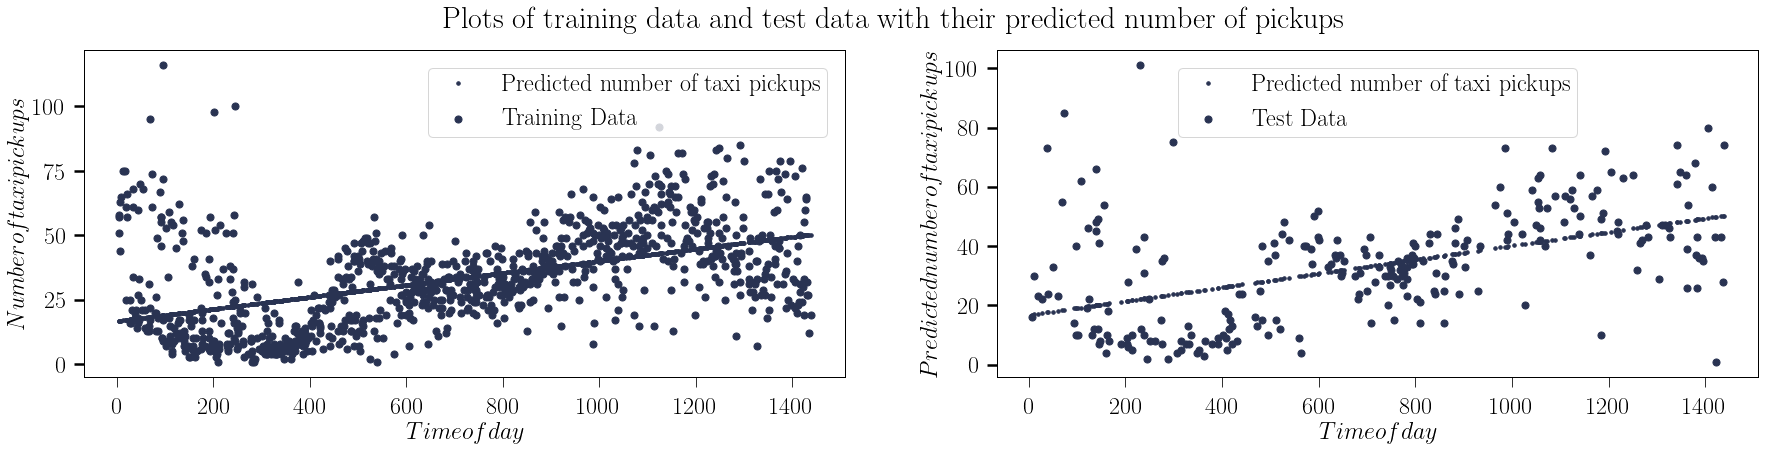

In [11]:
## Code for your plot here
'''
Re-create your plot from 2.2 using the predictions from OLSModel on the training and test set. 
You should have one figure with two subplots, one subplot for the training set and one for the test set.
'''
from collections import OrderedDict

# Predictions
prediction_train = OLSModel.predict(time_min_train)
prediction_test = OLSModel.predict(time_min_test)

# Plot best-fit lines
fig, ax_scat = plt.subplots(1, 2, figsize=(30, 6))
fig.suptitle('Plots of training data and test data with their predicted number of pickups', fontsize=30)

ax_scat[0].scatter(time_min_train[:,1], pickup_count_train, s=50, label='Training Data')
ax_scat[0].plot(time_min_train[:,1], prediction_train, '.', label='Predicted number of taxi pickups')
ax_scat[0].set_xlabel(r'$Time of day$')
ax_scat[0].set_ylabel(r'$Number of taxi pickups$');
ax_scat[0].legend()

ax_scat[1].scatter(time_min_test[:,1], pickup_count_test, s=50, label='Test Data')
ax_scat[1].plot(time_min_test[:,1], prediction_test, '.', label='Predicted number of taxi pickups')
ax_scat[1].set_xlabel(r'$Time of day$')
ax_scat[1].set_ylabel(r'$Predicted number of taxi pickups$');
ax_scat[1].legend()

**3.3**

In [12]:
## Code here
'''
Report the  R2 score for the fitted model on both the training and test sets. 
You may notice something peculiar about how they compare.
'''

rsquare_train = OLSModel.rsquared
print("R Square for training data = {0:8.6f}".format(rsquare_train))

pickup_count_test_arr = pickup_count_test
prediction_test_arr = prediction_test
pickup_count_mean = np.mean(prediction_test)

numerator = 0
denominator =0
for i in range(len(prediction_test_arr)):
    numerator += (prediction_test_arr[i]-pickup_count_test_arr[i])*(prediction_test_arr[i]-pickup_count_test_arr[i])
    denominator += (pickup_count_mean-pickup_count_test_arr[i])*(pickup_count_mean-pickup_count_test_arr[i])

R_squared_test = 1-(numerator/denominator)
print("R square for test data = {0:8.6f}".format(R_squared_test))

print("They seem to be pretty close.")

R Square for training data = 0.243026
R square for test data = 0.241066
They seem to be pretty close.


**3.4**

In [13]:
## Code here
# pull the beta parameters out from results_sm
beta0_sm = OLSModel.params[0]
beta1_sm = OLSModel.params[1]
print("The slope and intercept for the fitted model are: slope = {0:8.6f} and intercept = {1:8.6f}".format(beta1_sm, beta0_sm))

The slope and intercept for the fitted model are: slope = 0.023335 and intercept = 16.750601


**3.5**

In [14]:
## Code here
'''
Report the 95% confidence interval for the slope and intercept.
'''
conf_interval = OLSModel.conf_int(alpha=0.05)
beta0_interval_start = conf_interval[0,0]
beta0_interval_end = conf_interval[0,1]
beta1_interval_start = conf_interval[1,0]
beta1_interval_end = conf_interval[1,1]
print("The intercept has a 95% confidence interval of {0:8.6f} to {1:8.6f}.\nThe slope has a 95% confidence interval of {2:8.6f} to {3:8.6f}".format(beta0_interval_start,beta0_interval_end, beta1_interval_start, beta1_interval_end))

The intercept has a 95% confidence interval of 14.675141 to 18.826062.
The slope has a 95% confidence interval of 0.020777 to 0.025893


**3.6**

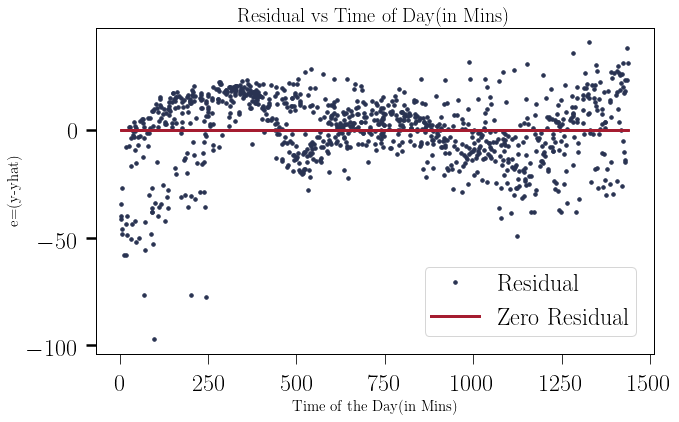

In [15]:
## Code here
'''
Create a scatter plot of the residuals(e=y−ŷ) of the linear regression model on the training set
as a function of the predictor variable (i.e. TimeMin). 
Place on your plot a horizontal line denoting the constant zero residual.
'''
y_hat = prediction_train
y = pickup_count_train
y_zeros = np.zeros(len(time_min_train))

fig, ax = plt.subplots(1,1, figsize=(10, 6))
plt.plot(time_min_train[:,1], y_hat-y, '.', label=r'Residual')
plt.plot(time_min_train[:,1], y_zeros, label=r'Zero Residual')
plt.legend()
plt.title("Residual vs Time of Day(in Mins)", fontsize=20)
plt.xlabel(r'Time of the Day(in Mins)', fontsize=15)
plt.ylabel(r'e=(y-yhat)', fontsize=15)
ax.legend()


**3.7**

**Discuss the results**

1. *How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?*

    **The $R^2$ score is significantly lower than the value obtained with k-NN regression**
    

2. *What does the sign of the slope of the fitted linear model convey about the data?* 

    **The sign of the slope indicated a positive linear relationship. As the time of day progresses, number of pickups increases.**
    

3. *Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?*  
    
    **The $95\%$ confidence interval is not a broad range and hence I consider the estimates of the model parameters to be reliable.**
    

4. *Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.*  

    **I expect the $99\%$ confidence interval for the slope and intercept to be looser than the $95\%$ confidence intervals. By increasing the confidence interval, we wish to increase the probability that the interval contains the population mean. For this, the interval will have to be looser. **
    

5. *Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.*

    **Since the points in the residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data.**
    


<div class="exercise">  <b> Question 4 [20 pts]: Roll Up Your Sleeves Show Some Class </b> </div>

We've seen Simple Linear Regression in action and we hope that you're convinced it works.  In lecture we've thought about the mathematical basis for Simple Linear Regression.  There's no reason that we can't take advantage of our knowledge to create our own implementation of Simple Linear Regression.  We'll provide a bit of a boost by giving you some basic infrastructure to use.  In the last problem, you should have heavily taken advantage of the `statsmodels` module.  In this problem we're going to build our own machinery for creating Linear Regression models and in doing so we'll follow the `statsmodels` API pretty closely.  Because we're following the `statmodels` API, we'll need to use python classes to create our implementation.  If you're not familiar with python classes don't be alarmed.  Just implement the requested functions/methods in the CS109OLS class that we've given you below and everything should just work.  If you have any questions, ask the teaching staff.

**4.1**. Implement the `fit` and `predict` methods in the CS109OLS class we've given you below as well as the `CS109r2score` function that we've provided outside the class.

**Hints**:

1. `fit` should take the provided numpy arrays `endog` and `exog` and use the normal equations to calculate the optimal linear regression coefficients.  Store those coefficients in self.params
2. In `fit` you'll need to calculate an inverse.  Use np.linalg.pinv
3. `predict` should use the numpy array stored in self.exog and calculate an np.array of predicted values.
4. `CS109r2score` should take the true values of the response variable `y_true` and the predicted values of the response variable `y_pred` and calculate and return the $R^2$ score. 
5.  To replicate the statsmodel API your code should be able to be called as follows:
    ```python
    mymodel = CS109OLS(y_data, augmented_x_data)
    mymodel.fit()
    predictions = mymodel.predict()
    R2score = CS109r2score(true_values, predictions)
    ```

**4.2**. As in 3.1 create a `CS109OLS` class instance and  fit a Linear Regression model on the training set (`train_data`).  Store your model in the variable `CS109OLSModel`.  Remember that as with sm.OLS your class should assume you want to fit an intercept as part of your linear model (so you may need to add a constant column to your predictors).

**4.3**  As in 3.2 Overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` on the training set with a scatter plot of `PickupCount` vs predictions of `TimeMin` from your `CS109OLSModel` Linear Regression model on the training set.  Do the same for the test set.  You should have one figure with two subplots, one subplot for the training set and one for the test set.  How does your figure compare to that in 3.2?

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)

**4.4**. As in 3.3, report the $R^2$ score for the fitted model on both the training and test sets using your `CS109OLSModel`.  Make sure to use the `CS109r2score` that you created.  How do the results compare to the the scores in 3.3?

**4.5**. as in 3.4, report the slope and intercept values for the fitted linear model your `CS109OLSModel`.   How do the results compare to the the values in 3.4?




### Answers

**4.1**

In [16]:
class CS109OLS(object):
    
    def __init__(self, endog = [], exog = []):
        
        ## Make sure you initialize self.params
        self.params = []
              
        ## store exog and endog in instance variables
        self.endog = np.array(endog)
        self.exog = np.array(exog)
  
                    
    def fit(self):
        
        #################
        # Your Code below
        #################
        
        # do something with self.exog and self.endog to calculate 
        # your linear regression coefficients
        # store the result in self.params
        
        # We need to find slope and intercept
        y_mean = np.mean(self.endog)
        x_mean = np.mean(self.exog)

        numerator =0
        denominator = 0
        y_arr = pickup_count_train
        x_arr = time_min_train[:,1]
        
        for i in range(len(y_arr)):
            numerator +=(x_arr[i]-x_mean)*(y_arr[i]-y_mean)
            denominator +=(x_arr[i]-x_mean)*(x_arr[i]-x_mean)

        slope = (numerator/denominator)
        print("Slope = {0:8.6f}".format(slope))

        intercept = (y_mean - slope*x_mean)
        print("Intercept = {0:8.6f}".format(intercept))
        
        self.intercept = intercept
        self.slope = slope
        self.params = [slope, intercept]
        return self
            
    def predict(self):
        
        # check if the linear regression coefficients have been calculated
        if not np.array(self.params).size:
            raise(Exception("fit() has not been called on OLS Model!"))
            
        #################
        # Your Code below
        #################
        
        # calculate your predictions based upon exog/self.exog and return them
        # as a numpy array
        y_predict= []
        for x in self.exog:
            y_temp = self.slope*x+self.intercept
            y_predict.append([y_temp])
        return y_predict


    def CS109r2score(self, y_true, y_pred):
        
        ### Your Code below ####
        y_train_arr = y_true
        y_mean = np.mean(self.endog)
        
        numerator=0
        denominator=0
        for i in range(len(y_pred)):
            numerator +=(y_pred[i]-y_train_arr[i])*(y_pred[i]-y_train_arr[i])
            denominator +=(y_mean-y_train_arr[i])*(y_mean-y_train_arr[i])

        r_squared = 1-(numerator/denominator)
        return r_squared

**4.2**

In [17]:
## Code here
myClassInst = CS109OLS(pickup_count_train, time_min_train[:,1])

CS109OLSModel = myClassInst.fit()

Slope = 0.023335
Intercept = 16.750601


**4.3**

Slope = 0.023328
Intercept = 17.193807


Text(0.5,0.98,'Figure 4.3')

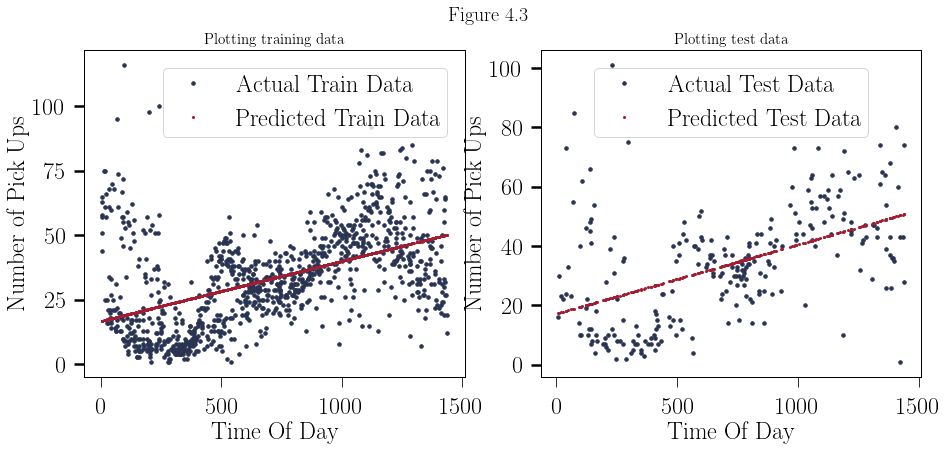

In [18]:
## Code for your plot here

prediction_train = CS109OLSModel.predict()
CS109OLSModelTest = CS109OLS(pickup_count_test, time_min_test[:,1]).fit()
prediction_test = CS109OLSModelTest.predict()

fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].plot(time_min_train[:,1], pickup_count_train, '.', label="Actual Train Data")
ax[0].plot(time_min_train[:,1], prediction_train, 'o', markersize=2, label="Predicted Train Data")
ax[0].set_title("Plotting training data", fontsize=15)
ax[0].set_xlabel("Time Of Day")
ax[0].set_ylabel("Number of Pick Ups")
ax[0].legend()

ax[1].plot(time_min_test[:,1], pickup_count_test,'.', label="Actual Test Data")
ax[1].plot(time_min_test[:,1], prediction_test, 'o', markersize=2, label="Predicted Test Data")
ax[1].set_title("Plotting test data", fontsize=15)
ax[1].set_xlabel("Time Of Day")
ax[1].set_ylabel("Number of Pick Ups")
ax[1].legend()

fig.suptitle("Figure 4.3", fontsize=20)

**4.4**

In [19]:
## Code here

R_square_train = CS109OLSModel.CS109r2score(pickup_count_train, prediction_train)
R_square_test = CS109OLSModelTest.CS109r2score(pickup_count_test, prediction_test)

print("R Square for training data = {0:0.6f}".format(R_square_train[0]))
print("R Square for test data = {0:0.6f}".format(R_square_test[0]))

print("The results are the same as 3.3")

R Square for training data = 0.243026
R Square for test data = 0.241197
The results are the same as 3.3


**4.5**

In [20]:
## Code here
beta0_sm = CS109OLSModel.params[0]
beta1_sm = CS109OLSModel.params[1]
print("The intercept and slope for the fitted model are: intercept = {0:8.6f} and slope = {1:8.6f}".format(beta1_sm, beta0_sm))
print("The slope results are the same and the intercept results are very close to the results from 3.4")

The intercept and slope for the fitted model are: intercept = 16.750601 and slope = 0.023335
The slope results are the same and the intercept results are very close to the results from 3.4


<div class="exercise"><b> Question 5 </b></div>.

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.


**5.1**. We've provided you with two files `outliers_train.csv` and `outliers_test.csv` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**5.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**5.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?  

**5.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  The return value should be a list `outlier_indices` representing the indices of the outliers in the original datasets you passed in.  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.

**Hint:** 
    1. What measure might you use to compare the performance of different Linear Regression models?

**5.5** Create a figure with two subplots.  In one subplot include a visualization of the Linear Regression line from the full training set overlayed on the test set data in `outliers_test`.  In the other subplot include a visualization of the Linear Regression line from the training set data with outliers removed overlayed on the test set data in `outliers_test`.  Visually which model fits the test set data more closely?

**5.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**5.7**. One potential problem with the brute force outlier detection approach in 5.3 and the heuristic algorithm constructed in 5.4 is that they assume prior knowledge of the number of outliers.  In general we can't expect to know ahead of time the number of outliers in our dataset.  Alter the algorithm you constructed in 5.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order that your algorithm found them).  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
   1. How many outliers should you try to identify in each step? (i.e. is there any reason not to try to identify one outlier at a time)
   2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
   3. As mentioned earlier we don't know ahead of time how many outliers to expect in the dataset or know mathematically  how we'd define a point as an outlier.  For this general algorithm, whatever measure you use to determine a point's impact on the Linear Regression model (e.g. difference in R^2, size of the residual or maybe some other measure) you may want to determine a tolerance level for that measure at every step below which your algorithm stops looking for outliers.
   4. You may also consider the maximum possible number of outliers it's reasonable for a dataset of size $n$ to have and use that as a cap for the total number of outliers identified (i.e. would it reasonable to expect all but one point in the dataset to be an outlier?)
    
**5.8**. Run your algorithm in 5.7 on the training set data.  

   1. What outliers does it identify?
   2. How do those outliers compare to the outliers you found in 5.4?
   3. How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?

### Answers

**5.1**

Text(0,0.5,'Y')

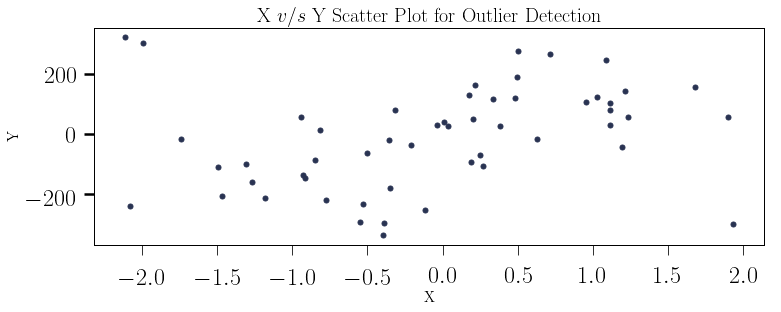

In [21]:
train_df = pd.read_csv("outliers_train.csv")

fig, ax = plt.subplots(1,1,figsize=(12,4))
ax.scatter(train_df.X, train_df.Y, s=25)
plt.title(r'X $v/s$ Y Scatter Plot for Outlier Detection', fontsize=20)
plt.xlabel("X", fontsize=15)
plt.ylabel("Y", fontsize=15)

*What does a visual inspection of training set tell you about the existence of outliers in the data?*
  
**The visual inspection shows 3 blatant outliers(and potentially more). Two at the top left corner and one at the bottom right corner.**

**5.2**

In [22]:
## Code here
X = sm.add_constant(train_df.X)
OutlierOLSModel =sm.OLS(train_df.Y, X).fit()
OutlierOLSModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.689
Date:                Tue, 10 Jul 2018   Prob (F-statistic):             0.0351
Time:                        22:27:18   Log-Likelihood:                -343.59
No. Observations:                  53   AIC:                             691.2
Df Residuals:                      51   BIC:                             695.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.5063     22.192     -0.428      0.670     -54.059      35.046
X             47.3554     21.869      2.165      0.035       3.452      91.259
==============================================================================
Omnibus:                        2.102   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                1.251
Skew:                           0.215   Prob(JB):                        0.535
Kurtosis:                       3.617   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**5.3**

*You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?*


In [23]:
number_of_rows = len(train_df)
print(number_of_rows)

53


 
**We need to select 50 training set data points by brute force to cover all possibilities.**

**The problem can be rephrased as: In how many different ways can we select 50 items from a set of 53. This can be solved using combinations nCk.**

**Using this method, we have to calculate the Linear Regression coefficients on the training data 23,426 (twenty-three thousand four hundred twenty-six ) times.**


In [24]:
'''
To calculate that we need to calculate the combination of values with 50 out of 53 samples that we have
C(53, 50) = 53!/50!*(53-50)!
'''

def factorial(n):
    if (n==1):
        return n
    else:
        return n*factorial(n-1)

val = (factorial(53)/(factorial(50)*factorial(53-50)))

print('Using this method, we have to calculate the Linear Regression coefficients on the training data {0:5.0f} times.'.format(val))

Using this method, we have to calculate the Linear Regression coefficients on the training data 23426 times.


**5.4**

In [25]:
## Code here

def find_outliers_simple(dataset_x: [float], dataset_y: [float]) -> [float]:
    y_predict = OutlierOLSModel.predict()
    res = y_predict-dataset_y
    res_sort = np.sort(np.abs(dataset_y-y_predict))
    third_largest = res_sort[-3:-2]
    print("3rd Largest residual = {0:3.4f}".format(third_largest[0]))
    print("Top 3 Residual Values are {0:3.4f}, {1:3.4f} and {2:3.4f}".format(res_sort[-3:-1][0], res_sort[-3:-1][1], res_sort[-3:-2][0]))
    outlier_indices = []
    for idx, v in res.items():
        if(np.abs((v))>=third_largest):
           outlier_indices.append(idx)

    print("Outlier indices are ",outlier_indices)
    return outlier_indices


In [26]:
outlier_indices  = find_outliers_simple(train_df.X, train_df.Y)
OutliersFreeDF = train_df.drop(outlier_indices)
X_OFree = sm.add_constant(OutliersFreeDF.X)
OutlierFreeSimpleModel = sm.OLS(OutliersFreeDF.Y, X_OFree).fit()

3rd Largest residual = 378.9371
Top 3 Residual Values are 378.9371, 406.7909 and 378.9371
Outlier indices are  [50, 51, 52]


**5.5**

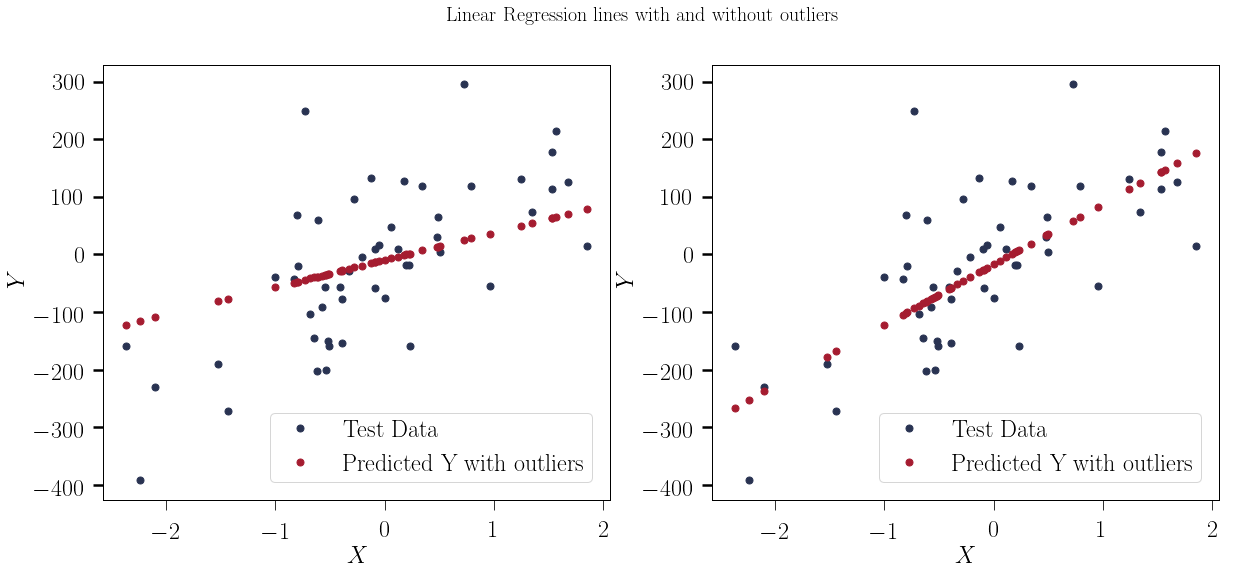

In [27]:
## Code for your plot here

outliers_test = pd.read_csv("outliers_test.csv")

fig, ax = plt.subplots(1,2, figsize=(20,8))
fig.suptitle("Linear Regression lines with and without outliers", fontsize=20)

X_test = sm.add_constant(outliers_test.X)
y_predict_test = OutlierOLSModel.predict(X_test)

ax[0].plot(outliers_test.X, outliers_test.Y,'o', label='Test Data')
ax[0].plot(outliers_test.X, y_predict_test, 'o', label='Predicted Y with outliers')
ax[0].set_xlabel(r'$X$')
ax[0].set_ylabel(r'$Y$')
ax[0].legend()

y_predict_test_outliers_free = OutlierFreeSimpleModel.predict(X_test)
ax[1].plot(outliers_test.X, outliers_test.Y,'o', label='Test Data')
ax[1].plot(outliers_test.X, y_predict_test_outliers_free, 'o', label='Predicted Y with outliers')
ax[1].set_xlabel(r'$X$')
ax[1].set_ylabel(r'$Y$')
ax[1].legend()


** Visually, the model without the outliers fits the test set data more closely. **

**5.6**

In [28]:
## Code here
r_squared_with_outlier = OutlierOLSModel.rsquared
r_squared_without_outlier = OutlierFreeSimpleModel.rsquared

print("R Squared value with outlier is {0:0.6f}, and R Squared value without the outlier is {1:0.6f}.".format(r_squared_with_outlier, r_squared_without_outlier))


R Squared value with outlier is 0.084202, and R Squared value without the outlier is 0.403706.


**5.7**

In [29]:
## Code here
def find_outliers_general(dataset_x, dataset_y):
    
    mean = np.mean(dataset_y)
    std = np.std(dataset_y)
    outliers_indices = []
    updated_y = []
    
    # Calculate the Z-Score
    # The critical Z score values when using a 95% confidence level are -1.96 and +1.96 standard deviations.
    z_score = np.abs((dataset_y - mean))/std
    z_score = z_score[z_score>=1.96]
    
    if(len(z_score.index)>0): # If an outlier was detected in this iteration
        # Append the index of detected outlier to the list
        for index in z_score.index:
            outliers_indices.append(index)
        # Drop the value at that index and rerun the process
        updated_y = dataset_y.drop(z_score.index) 
        return outliers_indices + find_outliers_general(dataset_x, updated_y)
    else:
        return []
    return outliers_indices

**5.8**

In [30]:
## Code here
outlier_indices = find_outliers_general(train_df.X, train_df.Y)
print(outlier_indices)

[50, 1, 51]


In [31]:
OutliersFreeDF = train_df.drop(outlier_indices)
X_OFree = sm.add_constant(OutliersFreeDF.X)

OutlierFreeGeneralModel = sm.OLS(OutliersFreeDF.Y, X_OFree).fit()
r_squared_without_outlier = OutlierFreeGeneralModel.rsquared
print("R Squared value without the outlier is {0:0.6f}.".format(r_squared_without_outlier))


R Squared value without the outlier is 0.275331.


1. *What outliers does it identify?*
    
    **It identifies the same outliers at indices 1, 50 and 51 of the training set data.**
    
    
2. *How do those outliers compare to the outliers you found in 5.4?*
    
    **Two are the same but one is different.**


3. *How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?*

    **The R squared value for the simple outlier-free Linear Regression model in 5.6 was 0.403706. The R squared of 0.275331 from the general one is significantly worse**
    

---- 


In [32]:
from IPython.core.display import HTML
def css_styling(): styles = open("cs109.css", "r").read(); return HTML(styles)
css_styling()